In [1]:
# To make sure working directory
# Otherwise uncomment and run to include the current directory
import os
os.getcwd()

'/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project'

### Dependencies

In [2]:
import datetime as dt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Machine Learning

In [183]:
def get_data(filename):
    df = pd.read_csv(filename, parse_dates=True)
    df['date'] = pd.to_datetime(df.date)
    df = df.sort_values(['date', 'ticker'])
    date1 = input("Enter start date(YYYY-MM-DD):")
    date2 = input("Enter start date(YYYY-MM-DD):")
    date1 = dt.datetime.strptime(date1, "%Y-%m-%d") 
    date2 = dt.datetime.strptime(date2, "%Y-%m-%d") 
    df = df.loc[(df['date'] >= date1) & (df['date'] <= date2)]
    df = df.sort_values(['date', 'ticker'])
    return df

In [7]:
df = get_data('stocks_10companies_5_sectors.csv')

Enter start date(YYYY-MM-DD):2001-01-01
Enter start date(YYYY-MM-DD):2022-07-15


In [8]:
df

,ticker,date,code,open,high,low,close,adjclose,volume,gics_sector
6390,AAP,2020-01-02,AAP_2020-01-02,160.470001,160.949997,157.529999,159.410004,153.283569,944900.0,Consumer Discretionary
19170,AAPL,2020-01-02,AAPL_2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785904,135480400.0,Information Technology
12780,ABT,2020-01-02,ABT_2020-01-02,86.059998,86.959999,85.800003,86.949997,83.297440,4969000.0,Health Care
19809,AMAT,2020-01-02,AMAT_2020-01-02,62.000000,62.650002,61.700001,62.200001,60.680820,6647900.0,Information Technology
20448,AMD,2020-01-02,AMD_2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100.0,Information Technology
...,...,...,...,...,...,...,...,...,...,...
25559,SWKS,2022-07-15,SWKS_2022-07-15,100.000000,101.180000,98.739998,101.059998,101.059998,1666800.0,Information Technology
12779,TSLA,2022-07-15,TSLA_2022-07-15,720.000000,730.869995,710.669983,720.200012,720.200012,23165500.0,Consumer Discretionary
19169,UNH,2022-07-15,UNH_2022-07-15,526.059998,531.989990,515.450012,529.750000,529.750000,5741800.0,Health Care
31949,WELL,2022-07-15,WELL_2022-07-15,81.190002,81.480003,80.209999,81.220001,81.220001,2078600.0,Real Estate


In [9]:
def create_dataframe(data):
    dfs = dict(tuple(data.groupby('ticker')))
    df_f = {}
    for df in dfs:
        dfs[df].set_index('date', inplace = True)
        df_f[df] = dfs[df].adjclose
    df_f = pd.DataFrame(df_f)
    return df_f
    df_f

In [10]:
df1 = create_dataframe(df)

In [11]:
df1

,AAP,AAPL,ABT,AMAT,AMD,AMGN,AMT,AMZN,AVB,BIIB,...,PSA,PYPL,SBUX,SPG,STZ,SWKS,TSLA,UNH,WELL,WMT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,153.283569,73.785904,83.297440,60.680820,49.099998,222.913177,217.444458,94.900497,190.337555,294.239990,...,195.609177,110.750000,85.087051,126.021042,181.498627,117.296616,86.052002,281.931519,73.047607,114.296684
2020-01-03,153.293182,73.068565,82.281967,59.715004,48.599998,221.399857,217.549149,93.748497,192.165237,290.850006,...,197.718674,108.760002,84.591858,126.246880,182.684189,114.385162,88.601997,279.078461,74.332832,113.287689
2020-01-06,150.773880,73.650803,82.713074,58.427242,48.389999,223.098831,217.492020,95.143997,192.486649,290.820007,...,198.421829,110.169998,83.925255,126.906967,183.522766,112.370293,90.307999,281.015808,75.463081,113.057053
2020-01-07,148.985367,73.304428,82.253235,60.114990,48.250000,221.000626,212.857666,95.343002,188.298599,290.089996,...,197.635391,109.669998,83.668152,125.465141,176.968384,113.440392,93.811996,279.319366,74.970863,112.009598
2020-01-08,147.273773,74.483604,82.588531,60.075970,47.830002,221.167755,214.703827,94.598503,189.079254,292.660004,...,197.996262,111.820000,84.639473,126.290283,183.416733,115.243179,98.428001,285.208679,74.989113,111.625221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,181.750000,144.869995,108.408142,88.620003,76.949997,247.779999,257.989990,111.750000,190.550003,215.259995,...,313.799988,70.470001,77.900002,97.220001,241.139999,95.419998,703.030029,516.950012,82.110001,125.449997
2022-07-12,183.839996,145.860001,107.820755,88.730003,76.360001,246.970001,255.490005,109.220001,191.339996,215.580002,...,307.369995,71.430000,77.760002,97.599998,240.559998,96.510002,699.210022,514.419983,82.440002,125.070000
2022-07-13,185.339996,145.490005,105.740005,89.080002,77.519997,247.089996,255.919998,110.400002,190.550003,214.529999,...,306.079987,71.360001,77.919998,95.559998,244.979996,97.879997,711.119995,501.239990,81.910004,125.370003


### Look for some plots

<AxesSubplot:xlabel='date'>

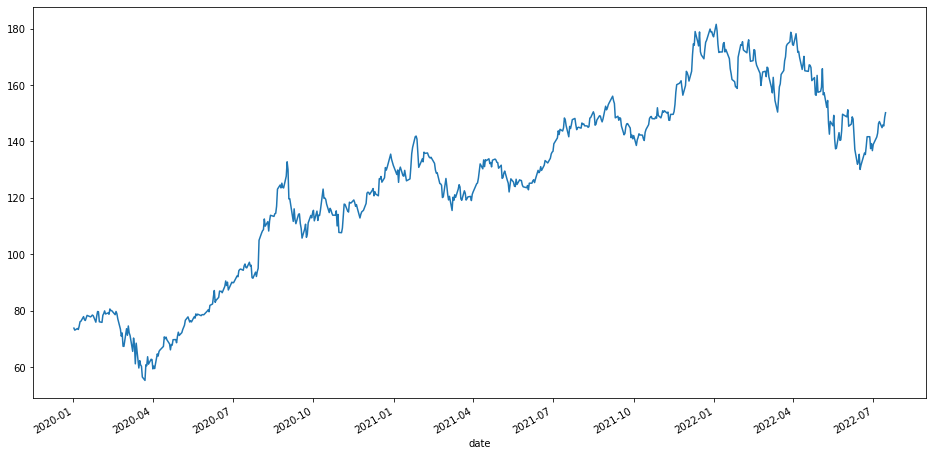

In [41]:
df1['AAPL'].plot(figsize = (16, 8))

In [50]:
def get_summary_close(symbol):
    close_min = df['close'].min()
    close_max = df['close'].max()
    close_mean = df['close'].mean()
    close_std = df['close'].std()
    return print(symbol, close_min, close_max, close_min, close_mean, close_std)

In [59]:
def normalize_data(df):
    return(df/df.iloc[0, :])

In [46]:
def plot_data(df, title = "S&P 500 Stock Data between 2018-01-02 and 2019-12-31"):
    ax = df.plot(title=title, fontsize = 2, figsize = (16, 8))
    ax.set_xlabel("Date")
    ax.set_ylabel("Closing Price")
    plt.show()

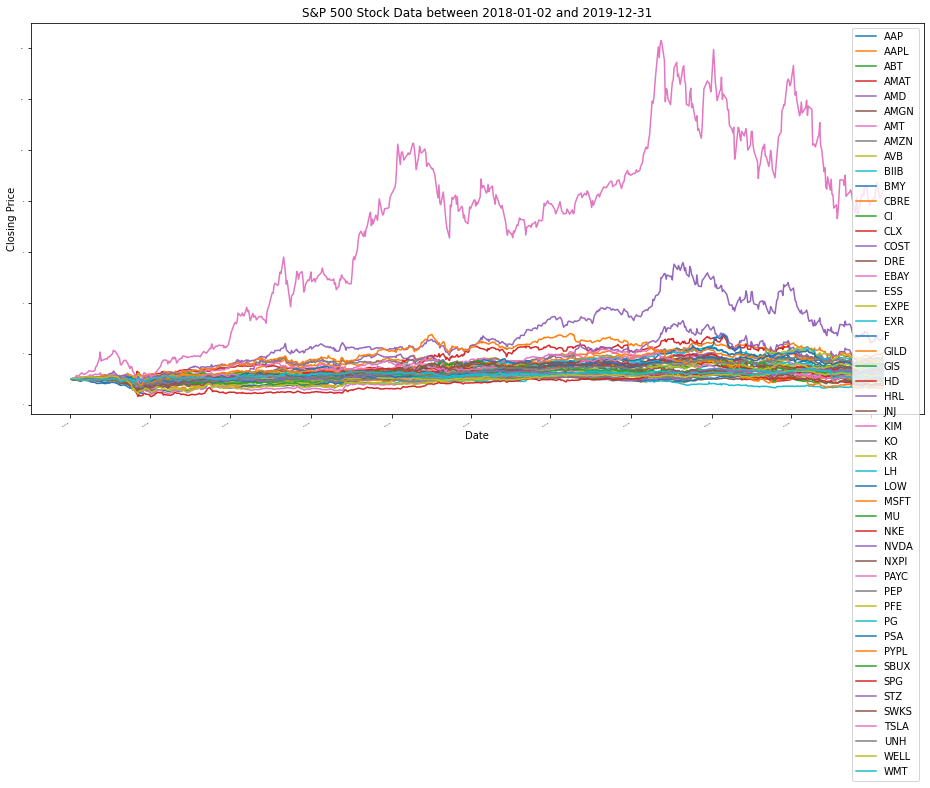

In [61]:
plot_data(normalize_data(df1))

In [62]:
df2 = normalize_data(df1)

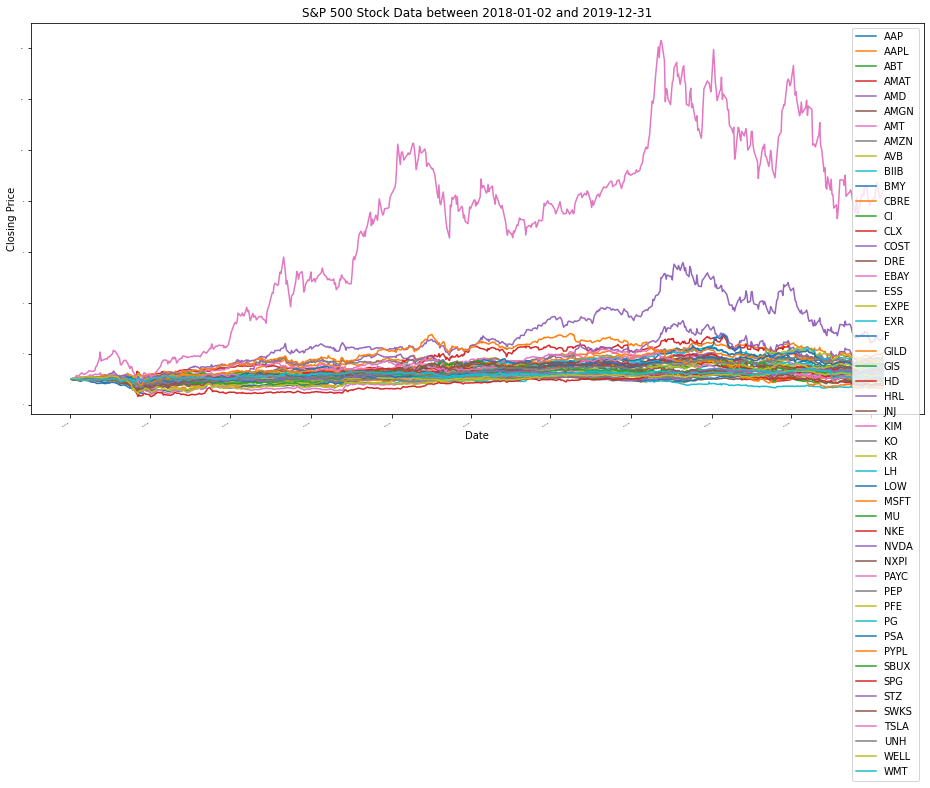

In [64]:
plot_data(df2)

In [ ]:
def get_bollinger_bands(rm, rstd):
    upper_band = rm + 2* rstd
    lower_band = rm - 2* rstd
    return upper_band, lower_band

In [53]:
def test_run2(st, ed):
    dates = pd.date_range(st, ed)
    symbols = ["AAPL"]
    df = get_data(symbols, dates)
    #print(df)
    ax = df["AAPL"].plot(figsize = (16, 8), title="AAPL Roling Mean, Lower and Upper Bounds", label = "AAPL")
    #rmAAPL = df["AAPL"].rolling(window = 20).mean()
    rmAAPL = get_rolling_means(df["AAPL"], 20)
    #print(rmAAPL)
    rmAAPL.plot(label = "Rolling mean", ax = ax)
    #rstdAAPL = df["AAPL"].rolling(window = 20).std()
    rstdAAPL = get_rolling_stds(df["AAPL"], 20)
    upper_band, lower_band = get_bollinger_bands(rmAAPL, rstdAAPL)
    #plot_data(df["AAPL"])
    upper_band.plot(label = "Upper Band", ax = ax)
    lower_band.plot(label = "Lower Band", ax = ax)
    ax.set_xlabel("Date")
    ax.set_ylabel("Closing Price")
    ax.legend(loc = "upper left")
    plt.show()

In [12]:
df1

,AAP,AAPL,ABT,AMAT,AMD,AMGN,AMT,AMZN,AVB,BIIB,...,PSA,PYPL,SBUX,SPG,STZ,SWKS,TSLA,UNH,WELL,WMT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,153.283569,73.785904,83.297440,60.680820,49.099998,222.913177,217.444458,94.900497,190.337555,294.239990,...,195.609177,110.750000,85.087051,126.021042,181.498627,117.296616,86.052002,281.931519,73.047607,114.296684
2020-01-03,153.293182,73.068565,82.281967,59.715004,48.599998,221.399857,217.549149,93.748497,192.165237,290.850006,...,197.718674,108.760002,84.591858,126.246880,182.684189,114.385162,88.601997,279.078461,74.332832,113.287689
2020-01-06,150.773880,73.650803,82.713074,58.427242,48.389999,223.098831,217.492020,95.143997,192.486649,290.820007,...,198.421829,110.169998,83.925255,126.906967,183.522766,112.370293,90.307999,281.015808,75.463081,113.057053
2020-01-07,148.985367,73.304428,82.253235,60.114990,48.250000,221.000626,212.857666,95.343002,188.298599,290.089996,...,197.635391,109.669998,83.668152,125.465141,176.968384,113.440392,93.811996,279.319366,74.970863,112.009598
2020-01-08,147.273773,74.483604,82.588531,60.075970,47.830002,221.167755,214.703827,94.598503,189.079254,292.660004,...,197.996262,111.820000,84.639473,126.290283,183.416733,115.243179,98.428001,285.208679,74.989113,111.625221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,181.750000,144.869995,108.408142,88.620003,76.949997,247.779999,257.989990,111.750000,190.550003,215.259995,...,313.799988,70.470001,77.900002,97.220001,241.139999,95.419998,703.030029,516.950012,82.110001,125.449997
2022-07-12,183.839996,145.860001,107.820755,88.730003,76.360001,246.970001,255.490005,109.220001,191.339996,215.580002,...,307.369995,71.430000,77.760002,97.599998,240.559998,96.510002,699.210022,514.419983,82.440002,125.070000
2022-07-13,185.339996,145.490005,105.740005,89.080002,77.519997,247.089996,255.919998,110.400002,190.550003,214.529999,...,306.079987,71.360001,77.919998,95.559998,244.979996,97.879997,711.119995,501.239990,81.910004,125.370003


In [42]:
# df2 = df.groupby("ticker").agg({"close": lambda x: list(x)})

In [45]:
df2 = df.groupby("ticker").agg(list)

In [52]:
type(df2)

pandas.core.frame.DataFrame

In [59]:
df2 = df[['ticker', 'date', 'open', 'close']]

In [61]:
df2

,ticker,date,open,close
6390,AAP,2020-01-02,160.470001,159.410004
19170,AAPL,2020-01-02,74.059998,75.087502
12780,ABT,2020-01-02,86.059998,86.949997
19809,AMAT,2020-01-02,62.000000,62.200001
20448,AMD,2020-01-02,46.860001,49.099998
...,...,...,...,...
25559,SWKS,2022-07-15,100.000000,101.059998
12779,TSLA,2022-07-15,720.000000,720.200012
19169,UNH,2022-07-15,526.059998,529.750000
31949,WELL,2022-07-15,81.190002,81.220001


In [70]:
symbols = np.array(df['ticker'].unique).T

In [80]:
list = df['ticker'].unique()

In [81]:
list

array(['AAP', 'AAPL', 'ABT', 'AMAT', 'AMD', 'AMGN', 'AMT', 'AMZN', 'AVB',
       'BIIB', 'BMY', 'CBRE', 'CI', 'CLX', 'COST', 'DRE', 'EBAY', 'ESS',
       'EXPE', 'EXR', 'F', 'GILD', 'GIS', 'HD', 'HRL', 'JNJ', 'KIM', 'KO',
       'KR', 'LH', 'LOW', 'MSFT', 'MU', 'NKE', 'NVDA', 'NXPI', 'PAYC',
       'PEP', 'PFE', 'PG', 'PSA', 'PYPL', 'SBUX', 'SPG', 'STZ', 'SWKS',
       'TSLA', 'UNH', 'WELL', 'WMT'], dtype=object)

In [71]:
symbols

array(<bound method Series.unique of 6390      AAP
19170    AAPL
12780     ABT
19809    AMAT
20448     AMD
         ... 
25559    SWKS
12779    TSLA
19169     UNH
31949    WELL
6389      WMT
Name: ticker, Length: 31950, dtype: object>, dtype=object)

In [62]:
# Get dataframes into a list
dfs = [y for x, y in df2.groupby('ticker', as_index=False)]

In [63]:
dfs[0]

,ticker,date,open,close
6390,AAP,2020-01-02,160.470001,159.410004
6391,AAP,2020-01-03,158.029999,159.419998
6392,AAP,2020-01-06,157.740005,156.800003
6393,AAP,2020-01-07,156.899994,154.940002
6394,AAP,2020-01-08,154.850006,153.160004
...,...,...,...,...
7024,AAP,2022-07-11,182.899994,181.750000
7025,AAP,2022-07-12,181.759995,183.839996
7026,AAP,2022-07-13,181.990005,185.339996
7027,AAP,2022-07-14,182.410004,186.009995


In [64]:
close_prices = np.vstack([d["close"] for d in dfs])
open_prices = np.vstack([d["open"] for d in dfs])

In [65]:
close_prices

array([[159.41000366, 159.41999817, 156.80000305, ..., 185.33999634,
        186.00999451, 188.71000671],
       [ 75.08750153,  74.35749817,  74.94999695, ..., 145.49000549,
        148.47000122, 150.16999817],
       [ 86.94999695,  85.88999939,  86.33999634, ..., 106.20999908,
        105.70999908, 108.81999969],
       ...,
       [292.5       , 289.54000854, 291.54998779, ..., 501.23999023,
        502.42999268, 529.75      ],
       [ 80.13999939,  81.55000305,  82.79000092, ...,  81.91000366,
         80.09999847,  81.22000122],
       [118.94000244, 117.88999939, 117.65000153, ..., 125.37000275,
        127.81999969, 129.07000732]])

In [66]:
variation = close_prices - open_prices

In [67]:
variation

array([[-1.05999756,  1.38999939, -0.94000244, ...,  3.34999084,
         3.59999084,  0.52000427],
       [ 1.02750397,  0.06999969,  1.50249481, ...,  2.5       ,
         4.38999939,  0.38999939],
       [ 0.88999939,  0.13999939,  0.71999359, ..., -0.62999725,
         1.08000183,  1.40999603],
       ...,
       [-1.48001099,  2.27001953,  3.54998779, ..., -6.83001709,
         7.42999268,  3.69000244],
       [-1.94999695,  1.91000366,  0.70000458, ...,  0.37000275,
        -0.40000153,  0.02999878],
       [ 0.08000183, -0.37999725,  0.25      , ...,  0.93000031,
         3.65999603,  0.27000427]])

In [76]:
quotes = []

for symbol in symbols:
    print("Fetching quote history for %r" % symbol, file=sys.stderr)
    path = ('scsv/{}.csv')
    quotes.append(pd.read_csv(url.format(symbol)))

close_prices = np.vstack([q["close"] for q in quotes])
open_prices = np.vstack([q["open"] for q in quotes])

TypeError: iteration over a 0-d array

In [77]:
df_companies=pd.read_csv('companies.csv')

In [78]:
df_companies

,Symbol,Security,GICS_Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [87]:
tickier_dict={}
for element in list:
    df_companies[df_companies.Symbol.isin([element])]
    tickier_dict[element]: df_companies.Security

In [88]:
tickier_dict

{}

In [130]:
test = df_companies[df_companies['Symbol'].isin(list)]

In [131]:
test = test[['Symbol', 'Security']]

In [132]:
test

,Symbol,Security
2,ABT,Abbott
10,AAP,Advance Auto Parts
26,AMZN,Amazon
28,AMD,AMD
34,AMT,American Tower
39,AMGN,Amgen
45,AAPL,Apple Inc.
46,AMAT,Applied Materials
55,AVB,AvalonBay Communities
68,BIIB,Biogen


In [153]:
test['Security']

2                     Abbott
10        Advance Auto Parts
26                    Amazon
28                       AMD
34            American Tower
39                     Amgen
45                Apple Inc.
46         Applied Materials
55     AvalonBay Communities
68                    Biogen
76      Bristol Myers Squibb
94                CBRE Group
108                    Cigna
115                   Clorox
118    The Coca-Cola Company
126     Constellation Brands
132                   Costco
160              Duke Realty
165                     eBay
180     Essex Property Trust
187            Expedia Group
189      Extra Space Storage
203       Ford Motor Company
216            General Mills
219          Gilead Sciences
234           The Home Depot
236             Hormel Foods
263        Johnson & Johnson
272             Kimco Realty
276                   Kroger
278                  LabCorp
290                   Lowe's
313        Micron Technology
314                Microsoft
337           

In [172]:
symbol_dict = dict(zip(test['Symbol'], test['Security']))

In [173]:
len(symbol_dict)

50

In [174]:
symbols, names = np.array(sorted(symbol_dict.items())).T

quotes = []

for symbol in symbols:
    print("Fetching quote history for %r" % symbol, file=sys.stderr)
    path = ('csv/{}.csv'
           )
    quotes.append(pd.read_csv(path.format(symbol)))

close_prices = np.vstack([q["close"] for q in quotes])
open_prices = np.vstack([q["open"] for q in quotes])

# The daily variations of the quotes are what carry the most information
variation = close_prices - open_prices

Fetching quote history for 'AAP'
Fetching quote history for 'AAPL'
Fetching quote history for 'ABT'
Fetching quote history for 'AMAT'
Fetching quote history for 'AMD'
Fetching quote history for 'AMGN'
Fetching quote history for 'AMT'
Fetching quote history for 'AMZN'
Fetching quote history for 'AVB'
Fetching quote history for 'BIIB'


FileNotFoundError: [Errno 2] No such file or directory: 'csv/BIIB.csv'

In [175]:
len(quotes)

9

In [176]:
# The daily variations of the quotes are what carry the most information
variation

array([[-1.05999756,  1.38999939, -0.94000244, ...,  3.34999084,
         3.59999084,  0.52000427],
       [ 1.02750397,  0.06999969,  1.50249481, ...,  2.5       ,
         4.38999939,  0.38999939],
       [ 0.88999939,  0.13999939,  0.71999359, ..., -0.62999725,
         1.08000183,  1.40999603],
       ...,
       [-1.48001099,  2.27001953,  3.54998779, ..., -6.83001709,
         7.42999268,  3.69000244],
       [-1.94999695,  1.91000366,  0.70000458, ...,  0.37000275,
        -0.40000153,  0.02999878],
       [ 0.08000183, -0.37999725,  0.25      , ...,  0.93000031,
         3.65999603,  0.27000427]])

In [177]:
from sklearn import covariance

alphas = np.logspace(-1.5, 1, num=10)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)

# standardize the time series: using correlations rather than covariance
# former is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

GraphicalLassoCV(alphas=array([ 0.03162278,  0.05994843,  0.11364637,  0.21544347,  0.40842387,
        0.77426368,  1.46779927,  2.7825594 ,  5.27499706, 10.        ]))

In [178]:
from sklearn import cluster

_, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=0)
n_labels = labels.max()

for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(names[labels == i])}")

Cluster 1: Applied Materials, AMD, Ford Motor Company, Micron Technology, Nvidia, NXP Semiconductors, Skyworks Solutions
Cluster 2: Biogen
Cluster 3: Advance Auto Parts, The Home Depot, Lowe's, Nike, Inc.
Cluster 4: Abbott, Amgen, Bristol Myers Squibb, Johnson & Johnson, Pfizer
Cluster 5: CBRE Group, Expedia Group, Kimco Realty, Simon Property Group, Welltower
Cluster 6: Apple Inc., Amazon, Costco, eBay, Microsoft, Paycom, PayPal, Starbucks, Tesla, Inc.
Cluster 7: Clorox, Gilead Sciences, General Mills, Hormel Foods, The Coca-Cola Company, Kroger, PepsiCo, Procter & Gamble, Constellation Brands, Walmart
Cluster 8: American Tower, AvalonBay Communities, Duke Realty, Essex Property Trust, Extra Space Storage, Public Storage
Cluster 9: Cigna, LabCorp, UnitedHealth Group


In [181]:
# Finding a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

from sklearn import manifold

node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver="dense", n_neighbors=6
)

embedding = node_position_model.fit_transform(X.T).T

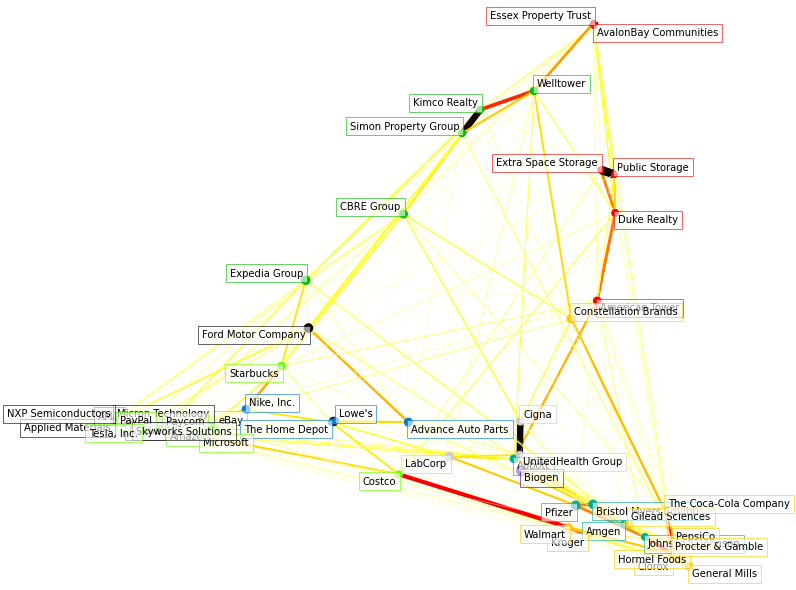

In [182]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.figure(1, facecolor="w", figsize=(10, 8))
plt.clf()
ax = plt.axes([0.0, 0.0, 1.0, 1.0])
plt.axis("off")

# Plot the graph of partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = np.abs(np.triu(partial_correlations, k=1)) > 0.02

# Plot the nodes using the coordinates of our embedding
plt.scatter(
    embedding[0], embedding[1], s=100 * d**2, c=labels, cmap=plt.cm.nipy_spectral
)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [
    [embedding[:, start], embedding[:, stop]] for start, stop in zip(start_idx, end_idx)
]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.hot_r, norm=plt.Normalize(0, 0.7 * values.max())
)
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = "left"
        x = x + 0.002
    else:
        horizontalalignment = "right"
        x = x - 0.002
    if this_dy > 0:
        verticalalignment = "bottom"
        y = y + 0.002
    else:
        verticalalignment = "top"
        y = y - 0.002
    plt.text(
        x,
        y,
        name,
        size=10,
        horizontalalignment=horizontalalignment,
        verticalalignment=verticalalignment,
        bbox=dict(
            facecolor="w",
            edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
            alpha=0.6,
        ),
    )

plt.xlim(
    embedding[0].min() - 0.15 * embedding[0].ptp(),
    embedding[0].max() + 0.10 * embedding[0].ptp(),
)
plt.ylim(
    embedding[1].min() - 0.03 * embedding[1].ptp(),
    embedding[1].max() + 0.03 * embedding[1].ptp(),
)

plt.show()